In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
# sns.set(rc={'figure.figsize':(10,8)})

import squarify

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Dimension reduction
from sklearn.decomposition import PCA

# Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # for finding epsilon for DBSCAN

# Evaluations
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import intercluster_distance
from yellowbrick.cluster import KElbowVisualizer

import datetime

from functions import *

In [84]:
df = pd.read_csv("df_rfm.csv")

In [85]:
df = df.select_dtypes([np.number])

In [86]:
df.columns

Index(['Unnamed: 0.1', 'freight', 'installments', 'dimension', 'review',
       'sequential', 'month', 'amt_products', 'recency', 'frequency',
       'monetary', 'R_score', 'M_score', 'F_score', 'rfm_score', 'Unnamed: 0',
       'diff_approved_purchase', 'diff_carrier_delivered_approved',
       'diff_customer_carrier_delivered', 'diff_estimated_delivered', 'price',
       'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'item_dimension', 'product_weight_g', 'review_score',
       'diff_recieved_reviewed', 'payment_sequential.1', 'order_month',
       'days_to_deliver', 'order_item_id'],
      dtype='object')

In [87]:
cols = ['installments', 'dimension', 'review', 'amt_products', 'recency', 'frequency', 'monetary', 'month', 'days_to_deliver', 'freight']
df = df[cols]
df.head(5)

# freight, 

,installments,dimension,review,amt_products,recency,frequency,monetary,month,days_to_deliver,freight
0,8.0,7616.0,5.0,1,111,1,141.90,5.0,6.0,12.00
1,1.0,5148.0,4.0,1,114,1,27.19,5.0,3.0,8.29
2,8.0,43750.0,3.0,1,536,1,86.22,3.0,25.0,17.22
3,4.0,1045.0,4.0,1,320,1,43.62,10.0,20.0,17.63
4,6.0,528.0,5.0,1,287,1,196.89,11.0,13.0,16.89


<AxesSubplot:>

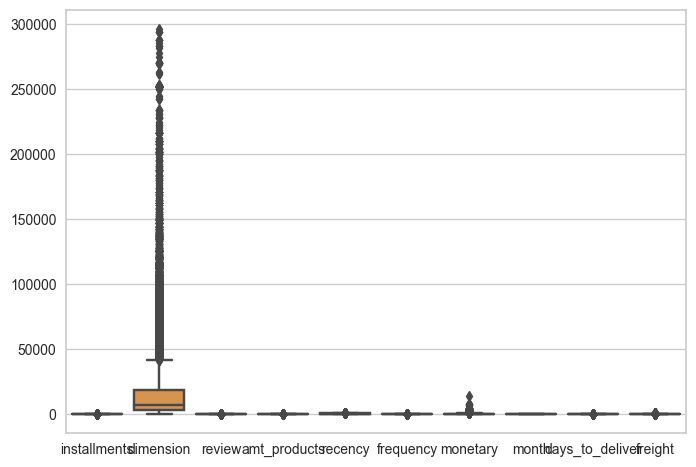

In [88]:
sns.boxplot(data=df)

In [89]:
df.describe()

,installments,dimension,review,amt_products,recency,frequency,monetary,month,days_to_deliver,freight
count,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000
mean,2.915176,15168.483189,4.158186,1.087059,235.500133,1.067817,167.063753,6.036729,12.046318,20.164473
std,2.688027,23036.224368,1.272179,0.400061,152.434134,0.350517,229.491720,3.191541,9.459027,15.705491
min,0.000000,168.000000,1.000000,1.000000,0.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.000000,2856.000000,4.000000,1.000000,112.000000,1.000000,62.250000,3.000000,6.000000,13.320000
50%,2.000000,6612.000000,5.000000,1.000000,216.000000,1.000000,107.790000,6.000000,10.000000,16.420000
75%,4.000000,18375.000000,5.000000,1.000000,344.000000,1.000000,185.940000,8.000000,15.000000,21.260000
max,24.000000,296208.000000,5.000000,14.000000,694.000000,14.000000,13664.080000,12.000000,208.000000,409.680000


In [90]:
var_high = ["dimension", "recency", "monetary", "review"]
var_low = ["installments", "amt_products", "frequency", "month", "days_to_deliver", "freight"]

<AxesSubplot:>

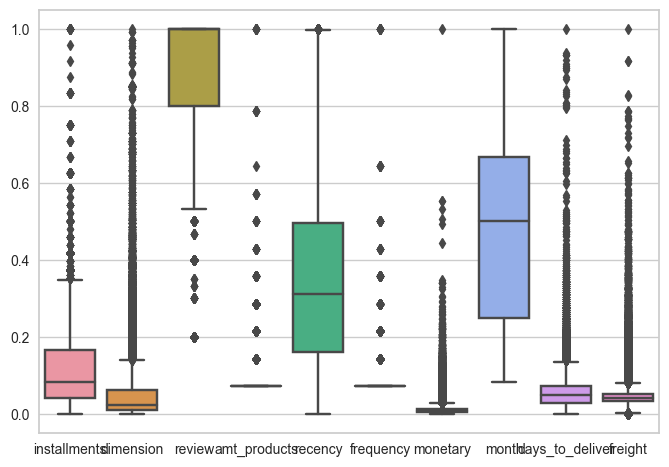

In [97]:
scaler = MaxAbsScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
sns.boxplot(data=df_scaled)

<AxesSubplot:>

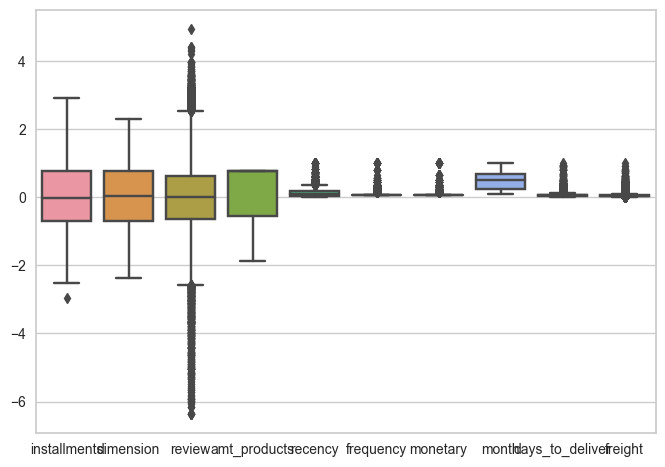

In [92]:
scaler = ColumnTransformer(
        transformers=[
            ("high_variance", PowerTransformer(), var_high),
            ("low_variance", MaxAbsScaler(), var_low)
        ]
)

df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
sns.boxplot(data=df_scaled)

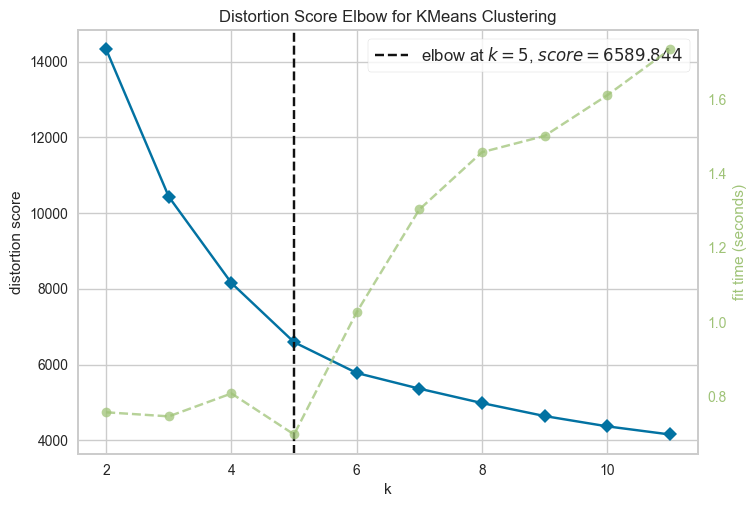

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
visualizer = KElbowVisualizer(
    KMeans(), k=(2,12), metric='distortion', init="k-means++"
)

visualizer.fit(df_scaled)
visualizer.show()

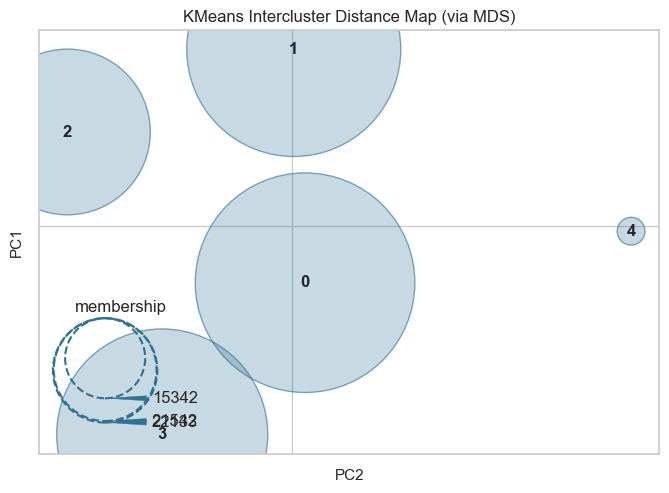

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=5))

In [99]:
intercluster_distance(KMeans(init="k-means++", n_clusters=5), df_scaled)

In [100]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=50, max_iter=500, random_state=42)

# Fit the algorithms to the features
kmeans.fit(df_scaled)

kmeans_silhouette = silhouette_score(
    df_scaled, kmeans.labels_
).round(2)

kmeans_silhouette

0.35

In [101]:
# all variables. silhouette 0.2
# without freight. silhouette 0.22
# without sequentiql silhouette 0,22
# 0,21